In [1]:
import pandas as pd
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_listing = pd.read_csv('listings.csv')

In [2]:
df_listing = df_listing[['id','name','description','neighborhood_overview','review_scores_rating']]
df_listing = df_listing.rename(columns={'id':'reviewer_id'})
df_reviews = pd.read_csv('reviews.csv')
df_to_work = df_reviews.merge(df_listing, left_on='listing_id', right_on='reviewer_id')
df_to_work.head()

,listing_id,id,date,reviewer_id_x,reviewer_name,comments,reviewer_id_y,name,description,neighborhood_overview,review_scores_rating
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,4.68
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,4.68
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,4.68
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r<b...,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,4.68
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,4.68


In [3]:
df_to_work.isna().sum()

listing_id                    0
id                            0
date                          0
reviewer_id_x                 0
reviewer_name                 0
comments                    123
reviewer_id_y                 0
name                          2
description                3393
neighborhood_overview    100239
review_scores_rating          0
dtype: int64

# EDA dos dados

* Para realizar a regressão vamos começar observando a distribuição e os valores médios dos dados relativos as amostragem das avaliações

/home/josu/workspace38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


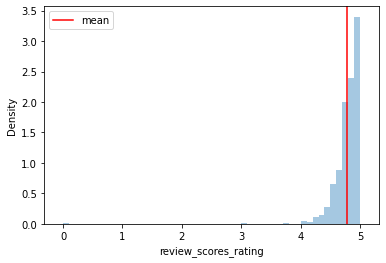

In [4]:
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt

ax = sns.distplot(df_to_work['review_scores_rating'], kde = True)

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
plt.axvline(df_to_work['review_scores_rating'].mean(), color='red', label='mean')
ax.legend(loc='best')
ax.lines[0].remove()

In [127]:
import seaborn as sns
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import unidecode
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from sklearn.decomposition import PCA

nltk.download('stopwords')
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')
class Vizualization():
    def __init__(self):
        pass
    
    def bar_plot(self,df, column, rotation):
        ax = sns.countplot(x=column, data=df, palette="Blues_d")
        ax.set_xticklabels(labels=df[column].unique(),rotation=rotation)
   
    def pie_chart_multy(self, df):
        fig, ax = plt.subplots(2,2, figsize=(14, 14))
        i = 0 
        j = 0
        for modality in df['modalidade'].unique():
            current_modality = df[df['modalidade']==modality]
            labels = current_modality['tipo_exame'].value_counts().index
            values = current_modality['tipo_exame'].value_counts().values
            ax[i, j].pie(values, autopct=lambda pct: self.func(pct, values))
            ax[i, j].legend(labels,
                      title=modality,
                      loc="center left",
                      bbox_to_anchor=(1, 0, 0.5, 1))
            if j == 1:
                i=+1
                j=-1
            j+=1
        plt.subplots_adjust(bottom=0.25, right=1.5)
        plt.show()

    def bar_plot_top_words(self, top_words):
        rcParams['figure.figsize'] = 15,7
        labels = [label[0] for label in top_words]
        frequencies = [freq[1] for freq in top_words]
        plot = pd.DataFrame([])
        plot['Word'] = labels
        plot['frequency'] = frequencies
        ax = sns.barplot(x="Word", y="frequency", data=plot, color="salmon", saturation=.5)
        p = ax.set_xticklabels(labels=plot['Word'],rotation=90)
    
    def func(self, pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n".format(pct)
    
    def plot_hbar(self, infos):
        infos = dict(sorted(infos.items(), key=lambda kv: kv[1]))

        plt.rcdefaults()
        fig, ax = plt.subplots()

        ranges = list(infos.keys())
        y_pos = np.arange(len(ranges))
        amount = list(infos.values())
    
        ax.barh(y_pos, amount,align='center')
        ax.set_yticks(y_pos, labels=ranges)
        ax.invert_yaxis()  
        ax.set_xlabel('Quantidade de Avaliações ')
        ax.set_ylabel('Range ')


        for i, v in enumerate(amount):
            ax.text(v + 3, i + .25, str(v), color='black')
        plt.figure(figsize=(30,30))
        plt.show()
    

class TextPreprocessing():
    def __init__(self):
        pass
       
    def remove_especial_character(self, text):
        text = unidecode.unidecode(text)
        return text

    def to_lower(self, text): 
        text = text.lower()
        return text
    
    def remove_ponctuation(self, text):
        text = re.sub(r'[^\w\s]', '', text)
        return text
    
    def remove_stopwords(self, text, stop_words):
        
        map(self.to_lower, stop_words)
        map(self.remove_especial_character, stop_words)
        tokenize = word_tokenize(text)
        removed = []
        for word in tokenize:
            if word not in stop_words:
                removed.append(word)
        return ' '.join(removed)

    def preprocesing(self, text, stop_words):
        text = self.to_lower(text)
        text = self.remove_especial_character(text)
        text = self.remove_ponctuation(text)
        text = self.remove_stopwords(text, stop_words)
        return text

class TextMining():
    
    def __init__(self):
        pass
    
    def get_top_n_features(self, corpus, n=None, ngram=(1,1)):
        vec = CountVectorizer(ngram_range=ngram).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]

[nltk_data] Downloading package stopwords to /home/josu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/josu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


* Como foi observado uma média muito alta nas avaliações divide em 'setores' as avaliações onde de 0 até 1 é o setor '1', de 1 até 2 o setor '2',  de 2 até 3 o setor '3',  de 3 até 4 o setor '4' e de 4 até 5 o setor '5' observando quantas amostras existem dentro de cada range

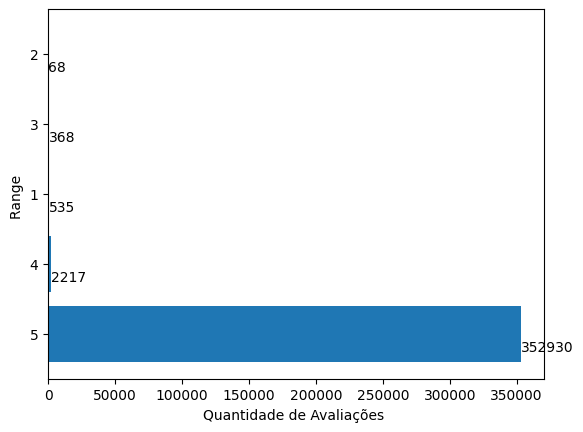

<Figure size 3000x3000 with 0 Axes>

In [128]:
import matplotlib.pyplot as plt
import numpy as np

k1 = df_to_work[(df_to_work['review_scores_rating']>=0) & (df_to_work['review_scores_rating']<=1)].shape[0]
k2 = df_to_work[(df_to_work['review_scores_rating']>1) & (df_to_work['review_scores_rating']<=2)].shape[0]
k3 = df_to_work[(df_to_work['review_scores_rating']>2) & (df_to_work['review_scores_rating']<=3)].shape[0]
k4 = df_to_work[(df_to_work['review_scores_rating']>3) & (df_to_work['review_scores_rating']<=4)].shape[0]
k5 = df_to_work[(df_to_work['review_scores_rating']>4) & (df_to_work['review_scores_rating']<=5)].shape[0]

infos = dict(zip(['1','2','3','4','5'], [k1,k2,k3,k4,k5]))

viz = Vizualization()
viz.plot_hbar(infos)

* Durante exploração do dataset, foi contado que existia diversos idiomas nas avaliações para entender melhor foi aplicado um detector de linguagem para entender quais eram os idiomas presentes, pois dependendo dessa informação é altamente relevante para determinar a arquitetura do modelo.

In [124]:
import langid
from tqdm.notebook import tqdm
idoms = []

for i in tqdm(df_to_work['comments']):
    lg, score = langid.classify(str(i))
    idoms.append(lg)

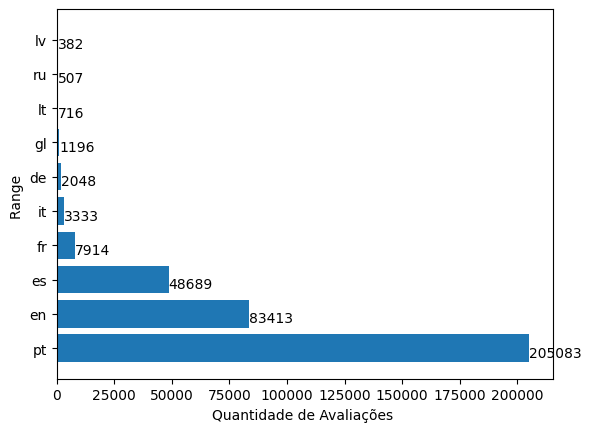

<Figure size 3000x3000 with 0 Axes>

In [130]:

viz = Vizualization()
df_to_work['idiom'] = idoms

idiom_detected = dict(
    zip(
        list(df_to_work['idiom'].value_counts().keys())[0:10],
        list(df_to_work['idiom'].value_counts())[0:10]
    )
)
viz.plot_hbar(idiom_detected)

* Existe um idioma predominante que é o português,  mas temos muitos idiomas no dataset então o modelo de linguagem deve ser multilingual para conserguimos convergia nossa função de regressão.

* Para poder melhor entender o nossos dados irei aplicar LDA para modelagem de tópicos nos 5 idiomas mais frequentes para observamos como são os textos dessas avaliações, para cada uma das modelagens de tópicos foram removidas as stopwords para deixar um resultado mais claro e sem ruído das informações;

In [73]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt  
from sklearn.decomposition import LatentDirichletAllocation

def topics(model, feature_names, no_top_words):
    dict_ = {}
    for topic_idx, topic in enumerate(model.components_):
        dict_[topic_idx] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return dict_

def plot_clouds(dict_, title):
    for topic, words in zip(dict_.keys(), dict_.values()):
        cloud = " ".join(words)
        wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white',  
                        min_font_size = 10).generate(cloud) 
  
        plt.figure(figsize = (4, 8), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.title(title + ' Topics '+ str(topic))
        plt.show() 


In [136]:
tqdm.pandas()
text_processing = TextPreprocessing()

pt = df_to_work[df_to_work['idiom']=='pt']
stop_words = set(stopwords.words('portuguese'))
pt['text_processing'] = pt['comments'].apply(lambda x : text_processing.preprocesing(x, stop_words))

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(pt['text_processing'])

In [137]:
topics_founded = LatentDirichletAllocation(random_state=42, n_components=3, n_jobs=10).fit(X)
topic_lda = topics(topics_founded, vectorizer.get_feature_names(), 10)

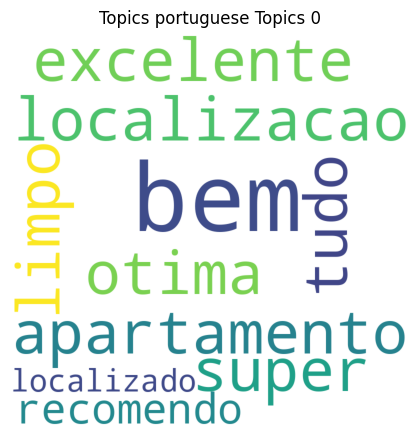

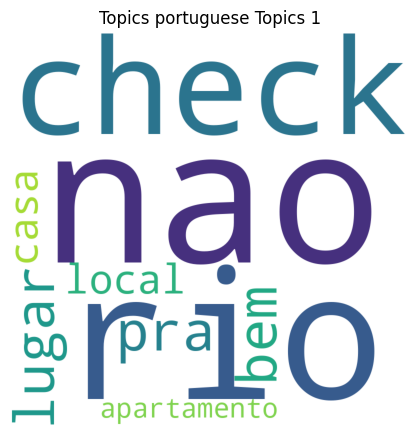

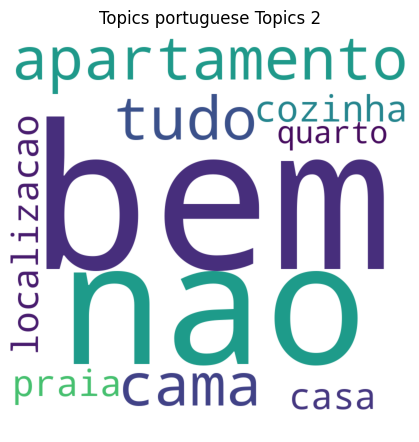

In [138]:
plot_clouds(topic_lda, 'Topics portuguese' )

In [139]:
stop_words = set(stopwords.words('english'))
en = df_to_work[df_to_work['idiom']=='en']
en['text_processing'] = en['comments'].astype(str)
en['text_processing'] = en['text_processing'].apply(lambda x : text_processing.preprocesing(x, stop_words))


In [140]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(en['text_processing'])
topics_founded = LatentDirichletAllocation(random_state=42, n_components=3, n_jobs=10).fit(X)
topic_lda = topics(topics_founded, vectorizer.get_feature_names(), 10)

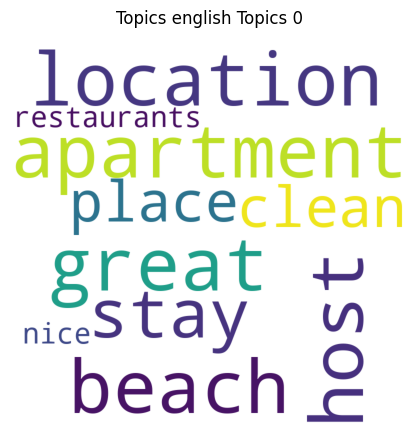

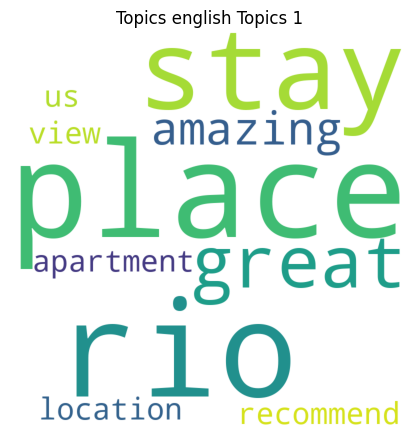

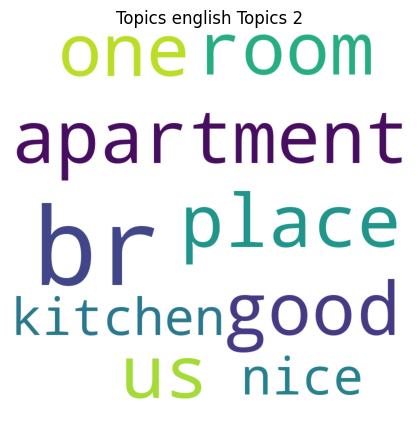

In [141]:
plot_clouds(topic_lda, 'Topics english' )

In [142]:
stop_words = set(stopwords.words('spanish'))
es = df_to_work[df_to_work['idiom']=='es']
es['text_processing'] = es['comments'].astype(str)
es['text_processing'] = es['text_processing'].apply(lambda x : text_processing.preprocesing(x, stop_words))
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(es['text_processing'])
topics_founded = LatentDirichletAllocation(random_state=42, n_components=3, n_jobs=10).fit(X)
topic_lda = topics(topics_founded, vectorizer.get_feature_names(), 10)

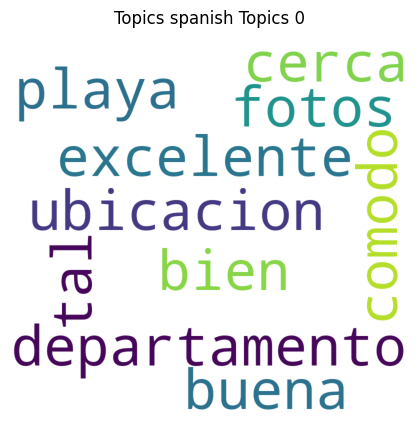

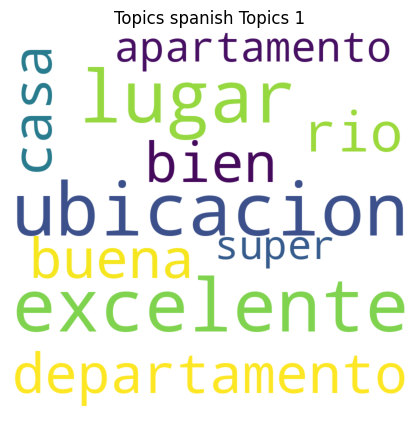

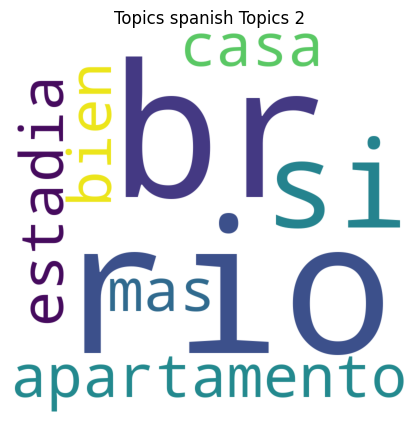

In [143]:
plot_clouds(topic_lda, 'Topics spanish' )

In [144]:
stop_words = set(stopwords.words('french'))
fr = df_to_work[df_to_work['idiom']=='fr']
fr['text_processing'] = fr['comments'].astype(str)
fr['text_processing'] = fr['text_processing'].apply(lambda x : text_processing.preprocesing(x, stop_words))
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(fr['text_processing'])
topics_founded = LatentDirichletAllocation(random_state=42, n_components=3, n_jobs=10).fit(X)
topic_lda = topics(topics_founded, vectorizer.get_feature_names(), 10)

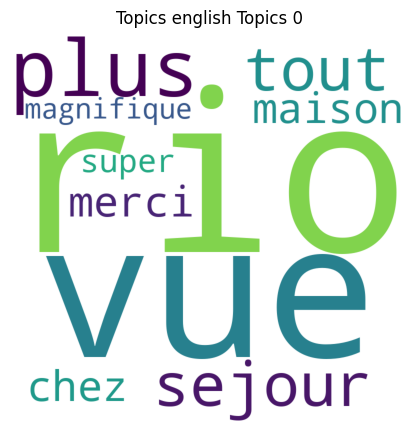

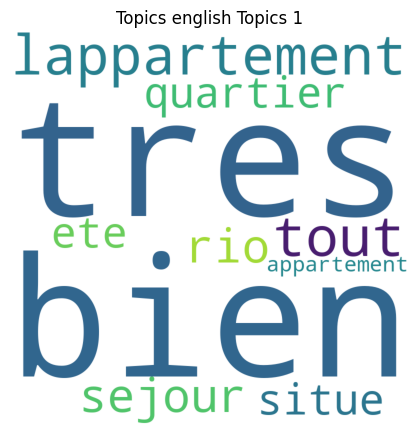

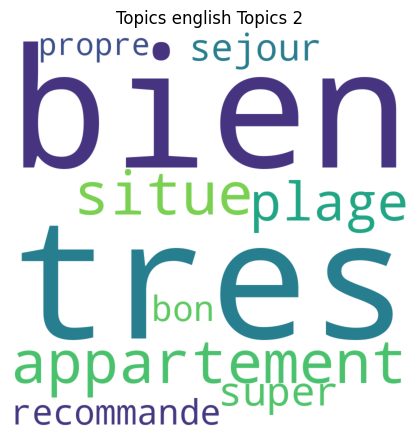

In [145]:
plot_clouds(topic_lda, 'Topics english' )

In [146]:
stop_words = set(stopwords.words('german'))
de = df_to_work[df_to_work['idiom']=='de']
de['text_processing'] = de['comments'].astype(str)
de['text_processing'] = de['text_processing'].apply(lambda x : text_processing.preprocesing(x, stop_words))
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(de['text_processing'])
topics_founded = LatentDirichletAllocation(random_state=42, n_components=3, n_jobs=10).fit(X)
topic_lda = topics(topics_founded, vectorizer.get_feature_names(), 10)

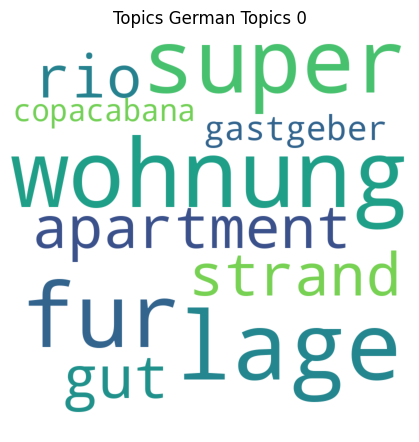

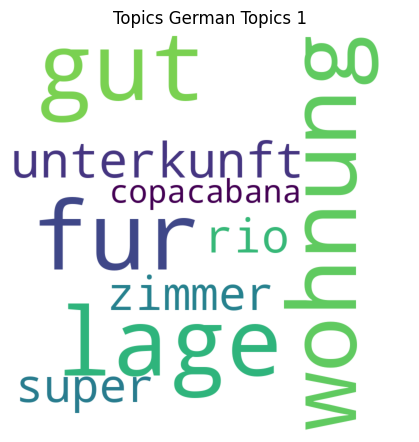

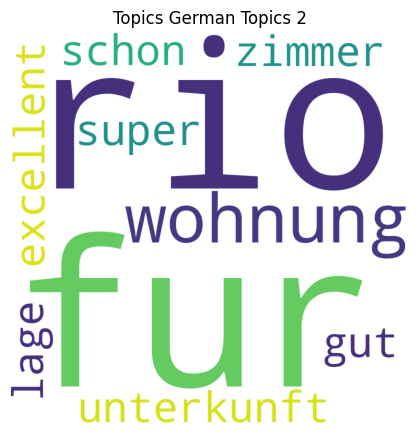

In [147]:
plot_clouds(topic_lda, 'Topics German' )

* Como esperado devido a alta média de avaliação, a maioria das palavras em todos os idiomas são palavras positivas quando a estadia e localização, geralmente elogiando o Rio de Janeiro ou o apartamento onde ficou